In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
#!mkdir /content/drive/MyDrive/advanced_cv_1403/fgic/stanford_dogs_dataset
#!mkdir /content/drive/MyDrive/advanced_cv_1403/fgic/stanford_dogs_dataset

In [ ]:
#!wget  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar -P /content/drive/MyDrive/advanced_cv_1403/fgic/
#!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar -P /content/drive/MyDrive/advanced_cv_1403/fgic/

#!tar -xvf /content/drive/MyDrive/advanced_cv_1403/fgic/images.tar -C /content/drive/MyDrive/advanced_cv_1403/fgic/stanford_dogs_dataset/
#!tar -xvf /content/drive/MyDrive/advanced_cv_1403/fgic/annotation.tar -C /content/drive/MyDrive/advanced_cv_1403/fgic/stanford_dogs_dataset/

### Importing Required Libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader, random_split, sampler
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, datasets, models
import random
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import math
import xml.etree.ElementTree as ET



In [ ]:
import torch
import torchvision
from tqdm import tqdm

In [ ]:
def crop_image(breed, dog, data_dir):
    img = plt.imread(data_dir + 'Images/' + breed + '/' + dog + '.jpg')
    tree = ET.parse(data_dir + 'Annotation/' + breed + '/' + dog)
    xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
    xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
    ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
    ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
    img = img[ymin:ymax, xmin:xmax, :]
    return img

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n020955

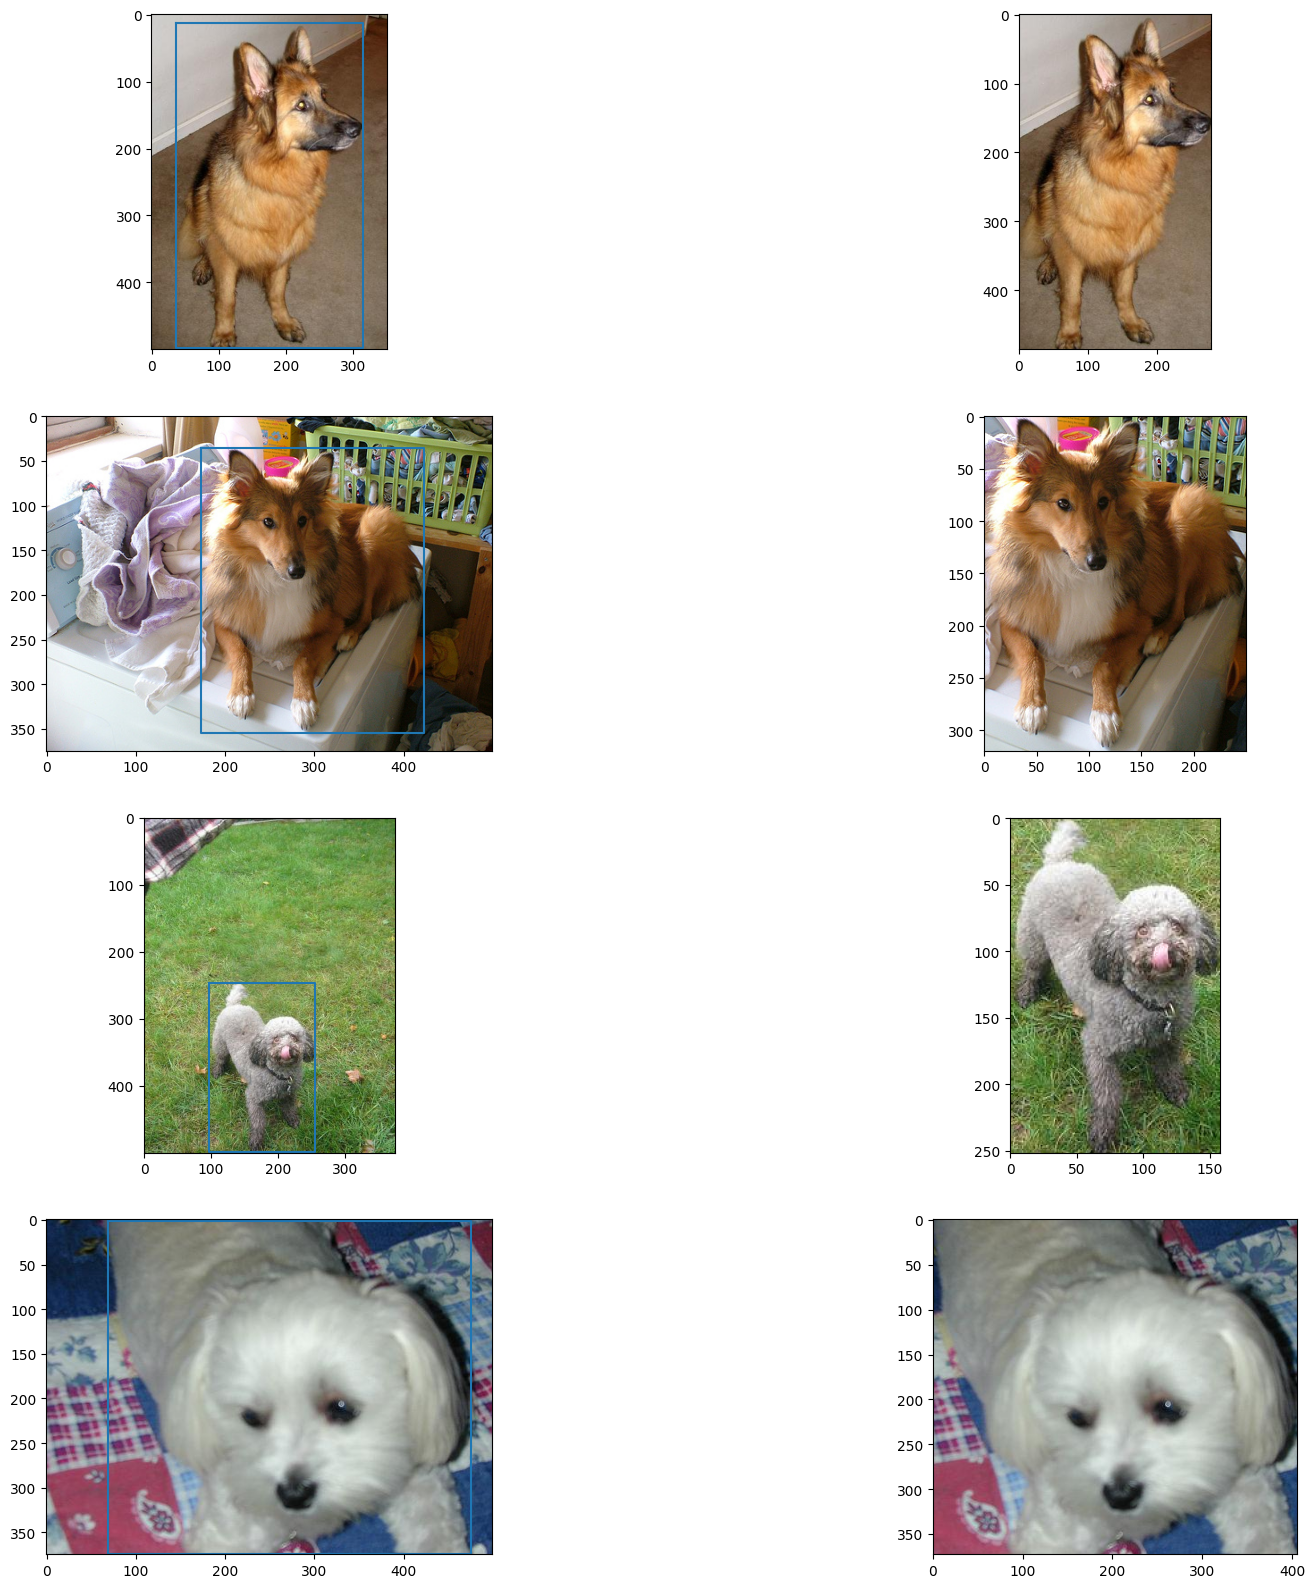

In [ ]:
data_dir = '/content/drive/MyDrive/advanced_cv_1403/fgic/stanford_dogs_dataset/'
breed_list = os.listdir(data_dir + 'Images/')
print(breed_list)

plt.figure(figsize=(20, 20))

for i in range(4):

    plt.subplot(421 + (i*2))

    breed = np.random.choice(breed_list)
    print(breed)
    dog = np.random.choice(os.listdir(data_dir + 'Annotation/' + breed))
    print(dog)
    img = plt.imread(data_dir + 'Images/' + breed + '/' + dog + '.jpg')
    plt.imshow(img)

    tree = ET.parse(data_dir + 'Annotation/' + breed + '/' + dog)
    xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
    xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
    ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
    ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)

    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin])

    crop_img = crop_image(breed, dog, data_dir)
    print(crop_img.shape)
    plt.subplot(422 + (i*2))
    plt.imshow(crop_img)

In [ ]:

if 'cropped_data' not in os.listdir(data_dir):
    crda = os.path.join(data_dir, 'cropped_data')
    os.mkdir(crda)

    for breed in breed_list:
      crdabreed = os.path.join(crda, breed)
      os.mkdir(crdabreed)

print('Created {} folders to store cropped images of the different breeds.'.format(len(os.listdir(crda)))) # Change is here

# Loop through breeds and images to crop and save

for breed in tqdm(breed_list):
    for dog in os.listdir(data_dir + 'Annotation/' + breed):
        # Crop the image
        crop_img = crop_image(breed, dog, data_dir)
        # Save the cropped image to the appropriate folder
        # Remove .xml extension from dog filename if present
        dog_name = dog.rsplit('.', 1)[0]
        plt.imsave(os.path.join(crda, breed, dog_name + '.jpg'), crop_img)



"\nif 'cropped_data' not in os.listdir(data_dir):\n    crda = os.path.join(data_dir, 'cropped_data')\n    os.mkdir(crda)\n    \n    for breed in breed_list:\n      crdabreed = os.path.join(crda, breed)\n      os.mkdir(crdabreed)\n    \nprint('Created {} folders to store cropped images of the different breeds.'.format(len(os.listdir(crda)))) # Change is here\n\n# Loop through breeds and images to crop and save\n\nfor breed in tqdm(breed_list):\n    for dog in os.listdir(data_dir + 'Annotation/' + breed):\n        # Crop the image\n        crop_img = crop_image(breed, dog, data_dir)\n        # Save the cropped image to the appropriate folder\n        # Remove .xml extension from dog filename if present\n        dog_name = dog.rsplit('.', 1)[0]  \n        plt.imsave(os.path.join(crda, breed, dog_name + '.jpg'), crop_img)\n\n        "

In [ ]:
img_count = 0

for folder in os.listdir(crda):
    crdafolder = os.path.join(crda, folder)
    print(crdafolder)
    print(os.listdir(crdafolder))
    for _ in os.listdir(crdafolder):
        img_count += 1
        print(img_count)

print('No. of Images: {}'.format(img_count))

Streaming output truncated to the last 5000 lines.
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
/content/drive/MyDrive/advanced_cv_1403/fgic/stanford_dogs_dataset/cropped_data/n02109525-Saint_Bernard
['n02109525_10146.jpg', 'n02109525_10215.jpg', 'n02109525_10297.jpg', 'n02109525_10417.jpg', 'n02109525_10545.jpg', 'n02109525_10743.jpg', 'n02109525_10792.jpg', 'n02109525_10805.jpg', 'n02109525_10992.jpg', 'n02109525_1100.jpg', 'n02109525_11274.jpg', 'n02109525_11465.jpg', 'n02109525_11747.jpg', 'n02109525_12041.jpg', 'n02109525_12155.jpg', 'n02109525_12272.jpg', 'n02109525_1239

In [ ]:
# Data Augmentation
batch_size = 256
image_size = 299

image_transforms = {

    'train':torchvision.transforms.Compose([
            torchvision.transforms.Resize(size=image_size),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.RandomCrop(size=image_size),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                             std=(0.229, 0.224, 0.225))
    ]),
    'val':torchvision.transforms.Compose([
            torchvision.transforms.Resize(size=image_size),
            torchvision.transforms.CenterCrop(size=image_size),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                             std=(0.229, 0.224, 0.225))
        ])
}

In [ ]:
all_data = datasets.ImageFolder(root=crda)

In [ ]:
all_data.classes

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [ ]:
train_data_len = int(len(all_data) * 0.8)
valid_data_len = int((len(all_data) - train_data_len) / 2)
test_data_len = int(len(all_data) - train_data_len - valid_data_len)

train_data, val_data, test_data = random_split(all_data, [train_data_len, valid_data_len, test_data_len])

train_data.dataset.transform = image_transforms['train']
val_data.dataset.transform = image_transforms['val']
test_data.dataset.transform = image_transforms['val']

print(len(train_data), len(val_data), len(test_data))

16464 2058 2058


In [ ]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

### Define Model BCNN
**We will use ResNets the base architecture as suggested in the paper**

![title](notebook_images/BCNN.png)

In [ ]:
trainiter = iter(train_loader)
features, labels = next(trainiter)
print(features.shape, labels.shape)

torch.Size([256, 3, 299, 299]) torch.Size([256])


In [ ]:
#!wget https://download.pytorch.org/models/resnet18-5c106cde.pth -P imagenet_models

In [ ]:
resnet = models.resnet18()
resnet.load_state_dict(torch.load('imagenet_models/resnet18-5c106cde.pth', weights_only=False), strict=False) # Setting weights_only to False to load legacy format


# freezing parameters
for param in resnet.parameters():
    param.requires_grad = False

layers = list(models.resnet18().children())[:-2]

if torch.cuda.is_available():
    resnet = nn.Sequential(*layers).cuda()
else:
    resnet = nn.Sequential(*layers)
    print("CUDA is not available. Model will run on CPU.")

CUDA is not available. Model will run on CPU.


In [ ]:
list(models.resnet18().children())

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
from torch import FloatTensor

def new_parameter(*size):
    out = nn.Parameter(FloatTensor(*size), requires_grad=True)
    torch.nn.init.xavier_normal_(out)
    return out


class Attention(nn.Module):

    def __init__(self, attention_size):
        super(Attention, self).__init__()
        self.attention = new_parameter(attention_size, 1)

    def forward(self, x_in):
        # after this, we have (bs, feature_size, feature_size) with a diff weight per each cell
        attention_score = torch.matmul(x_in, self.attention).squeeze()
        attention_score = F.softmax(attention_score, dim=-1).view(x_in.size(0), x_in.size(1), 1)
        scored_x = x_in * attention_score

        # now, sum across dim 1 to get the expected feature vector
        condensed_x = torch.sum(scored_x, dim=1)

        return condensed_x

In [ ]:
features = 512
fmap_size = 10

class CNN_Resnet_Attention(nn.Module):
    def __init__(self, fine_tune=False):
        super(CNN_Resnet_Attention, self).__init__()

        resnet = models.resnet18(pretrained=False)
        # Explicitly set weights_only=False to load legacy format
        resnet.load_state_dict(torch.load('imagenet_models/resnet18-5c106cde.pth', weights_only=False), strict=False) #strict=False in case you have some unexpected keys in saved dictionary

        # freezing parameters
        if not fine_tune:
            for param in resnet.parameters():
                param.requires_grad = False
        else:

            for param in resnet.parameters():
                param.requires_grad = True

        layers = list(resnet.children())[:-2]
        # Check CUDA availability before moving to GPU
        if torch.cuda.is_available():
            self.features = nn.Sequential(*layers).cuda()
        else:
            self.features = nn.Sequential(*layers)  # Keep on CPU if no CUDA
            print("CUDA is not available. Model will run on CPU.")
        self.attn = Attention(512)
        self.fc = nn.Linear(512, 120)
        self.dropout = nn.Dropout(0.5)

        # Initialize the fc layers.
        nn.init.xavier_normal_(self.fc.weight.data)

        if self.fc.bias is not None:
            torch.nn.init.constant_(self.fc.bias.data, val=0)
    def forward(self, x):

        ## X: bs, 3, 256, 256
        ## N = bs
        N = x.size()[0]

        ## x : bs, 1024, 14, 14
        x = self.features(x)

        # bs, (1024 * 196) matmul (196 * 1024)
        x = x.view(N, features, fmap_size ** 2)

        # Batch matrix multiplication
        x = torch.bmm(x, torch.transpose(x, 1, 2))/ (fmap_size ** 2)
        x = torch.sqrt(x + 1e-5)
        x = self.attn(x)
        x = self.dropout(x)
        x = self.fc(x)

        return x

In [ ]:
model = CNN_Resnet_Attention()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


CUDA is not available. Model will run on CPU.


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model.class_to_idx = all_data.class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())

[(0, 'n02085620-Chihuahua'),
 (1, 'n02085782-Japanese_spaniel'),
 (2, 'n02085936-Maltese_dog'),
 (3, 'n02086079-Pekinese'),
 (4, 'n02086240-Shih-Tzu'),
 (5, 'n02086646-Blenheim_spaniel'),
 (6, 'n02086910-papillon'),
 (7, 'n02087046-toy_terrier'),
 (8, 'n02087394-Rhodesian_ridgeback'),
 (9, 'n02088094-Afghan_hound'),
 (10, 'n02088238-basset'),
 (11, 'n02088364-beagle'),
 (12, 'n02088466-bloodhound'),
 (13, 'n02088632-bluetick'),
 (14, 'n02089078-black-and-tan_coonhound'),
 (15, 'n02089867-Walker_hound'),
 (16, 'n02089973-English_foxhound'),
 (17, 'n02090379-redbone'),
 (18, 'n02090622-borzoi'),
 (19, 'n02090721-Irish_wolfhound'),
 (20, 'n02091032-Italian_greyhound'),
 (21, 'n02091134-whippet'),
 (22, 'n02091244-Ibizan_hound'),
 (23, 'n02091467-Norwegian_elkhound'),
 (24, 'n02091635-otterhound'),
 (25, 'n02091831-Saluki'),
 (26, 'n02092002-Scottish_deerhound'),
 (27, 'n02092339-Weimaraner'),
 (28, 'n02093256-Staffordshire_bullterrier'),
 (29, 'n02093428-American_Staffordshire_terrier'),


In [ ]:
import torch
import torchvision
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split

# ... (other imports and code from your notebook) ...

def train(model,
          criterion,
          optimizer,
          train_loader,
          val_loader,
          save_location,
          early_stop=3,
          n_epochs=1,
          print_every=1):

    #Initializing some variables
    valid_loss_min = np.inf
    stop_count = 0
    valid_max_acc = 0
    history = []
    model.epochs = 0

    #Loop starts here
    for epoch in range(n_epochs):

        train_loss = 0
        valid_loss = 0

        train_acc = 0
        valid_acc = 0

        model.train()

        ### batch control
        ii = 0

        for data, label in train_loader:

            ii += 1

            # Use CUDA if available, otherwise use CPU
            if torch.cuda.is_available():
                data, label = data.cuda(), label.cuda()
            else:
                print("CUDA is not available. Training on CPU.")

            output = model(data)

            loss = criterion(output, label)
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)


            # Calculate accuracy by finding max log probability
            # first output gives the max value in the row(not what we want), second output gives index of the highest val
            _, pred = torch.max(output, dim=1)

            # using the index of the predicted outcome above, torch.eq() will check prediction index against label index to see if prediction is correct(returns 1 if correct, 0 if not)
            correct_tensor = pred.eq(label.data.view_as(pred))

            #tensor must be float to calc average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            train_acc += accuracy.item() * data.size(0)

            if ii%10 == 0:
                print(f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete.')

        model.epochs += 1

        with torch.no_grad():

            model.eval()

            for data, label in val_loader:

                # Use CUDA if available, otherwise use CPU
                if torch.cuda.is_available():
                    data, label = data.cuda(), label.cuda()

                output = model(data)
                loss = criterion(output, label)
                valid_loss += loss.item() * data.size(0)

                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(label.data.view_as(pred))
                accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
                valid_acc += accuracy.item() * data.size(0)

            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(val_loader.dataset)

            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(val_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            if (epoch + 1) % print_every == 0:

                print(f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}')
                print(f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%')

            if valid_loss < valid_loss_min:

                torch.save({
                    'state_dict': model.state_dict()
                    #'idx_to_class': model.idx_to_class
                }, save_location)

                stop_count = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            else:

                stop_count += 1

                # Below is the case where we handle the early stop case
                if stop_count >= early_stop:

                    print(f'\nEarly Stopping Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%')
                    model.load_state_dict(torch.load(save_location)['state_dict'])
                    model.optimizer = optimizer
                    history = pd.DataFrame(history, columns=['train_loss', 'valid_loss', 'train_acc','valid_acc'])
                    return model, history

    model.optimizer = optimizer
    print(f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%')

    history = pd.DataFrame(history, columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

    return model, history

In [ ]:
model, history = train(
    model,
    criterion,
    optimizer,
    train_loader,
    val_loader,
    save_location='dog_bcnn_resnet_attention.pt',
    early_stop=3,
    n_epochs=1,
    print_every=1)

CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
Epoch: 0	16.92% complete.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
Epoch: 0	32.31% complete.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Training on CPU.
CUDA is not available. Train

In [ ]:
history

,train_loss,valid_loss,train_acc,valid_acc
0,4.929049,4.635097,0.016217,0.022352


In [ ]:
def test(model, test_loader, criterion):
    with torch.no_grad():
        model.eval()
        test_acc = 0

        for data, label in test_loader:
            data, label = data, label

            output = model(data)

            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(label.data.view_as(pred))
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            test_acc += accuracy.item() * data.size(0)

        test_acc = test_acc / len(test_loader.dataset)
        return test_acc

In [ ]:
model.load_state_dict(torch.load('dog_bcnn_resnet_attention.pt')['state_dict'])
test_acc = test(model, test_loader, criterion)
print(f'The model has achieved an accuracy of {100 * test_acc:.2f}% on the test dataset')

The model has achieved an accuracy of 1.90% on the test dataset


In [ ]:
from torchsummary import summary
summary(model, input_size=(3, image_size, image_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 150, 150]           9,408
       BatchNorm2d-2         [-1, 64, 150, 150]             128
              ReLU-3         [-1, 64, 150, 150]               0
         MaxPool2d-4           [-1, 64, 75, 75]               0
            Conv2d-5           [-1, 64, 75, 75]          36,864
       BatchNorm2d-6           [-1, 64, 75, 75]             128
              ReLU-7           [-1, 64, 75, 75]               0
            Conv2d-8           [-1, 64, 75, 75]          36,864
       BatchNorm2d-9           [-1, 64, 75, 75]             128
             ReLU-10           [-1, 64, 75, 75]               0
       BasicBlock-11           [-1, 64, 75, 75]               0
           Conv2d-12           [-1, 64, 75, 75]          36,864
      BatchNorm2d-13           [-1, 64, 75, 75]             128
             ReLU-14           [-1, 64,